# Manatee Populatins in the Florida Everglades in Response to Ocean

Temperature

Natasha Zizic (Colorado State University)  
Genesis Lacy (Colorado State University)

### Introduction

The Everglades in Southern Florida have some of the most biodiverse ecosystems. Mangroves provide a multitude of resources, ecosystem services and mitigation against natural disasters Kathiresan ([2012](#ref-kath)). Manatees are large mammals that live in aquatic ecosystems that are key to the processes that occur in those ecosystems. Manatees had been added to the endangered species list until 2017 in regards to water quality and malnourishment Garder ([2025](#ref-FWA)) but then moved down to the threatened list of species. This study will explore if ocean temperature prohibits manatees from birthing in certain areas. We hope that this research will further demonstrate how climate change, increased ocean temperatures and global warming might be affecting birth rates. We are also interested in whether migration patterns affected by ocean temperature impacts the birth rates. Since manatees are endangered species Littles et al. ([2016](#ref-litt)), we hope to learn about these patterns to determine what can be done to protect this species. Although there are many factors that impact manatee birth rates, we will be primarily focusing on its correlation specifically to ocean temperature.

### Exploring Our Data

**Manatee Data:**

We have two sets of manatee data:

The first set is the Manatee Synoptic Survey Observation Locations from The Florida Fish and Wildlife Conservation Commission USGS ([2025](#ref-FFW)). This data represents a statewide survey of manatee populations from 1991 through 2019. The data is taken in the winter months, when manatees typically migrate inland. This data covers a long time span, and and wide range in terms of location. Unfortunately, the locations in this data set are distinguished by location ID numbers, rather than with latitude and longitude. This makes it difficult to spatially visualize the data. We will continue to look into this data set to determine if we can find correlating coordinates for each location ID. This would allow us to use the data for more visualizations, including maps.

Our second data set is from the US Department of the Interior Slone ([2022](#ref-GPS)). It comes from a GPS telemetry of 40 manatees in Southwest Florida from 2002 to 2008. This time span is not ideal for our research because it is from long ago. However, it does have some good qualities. It is directly related to an available water temperature data set. This will allow us to examine exactly how an increase in ocean temperature will affect the migration patterns of the manatees.

The following maps represent How the manatees In Southwest Florida have migrated over time, from 2002 to 2008. This data comes from the US Department of the Interior’s GPS telemetry Slone ([2022](#ref-GPS)). We can see a dispersal of the manatees over time. Some are migrating in a northern direction, and others are moving inland. This shows that time (and possibly water temperature) is having an impact on their migration patterns.

In [ ]:
library(readr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

In [ ]:
man2 <- read.csv("~/Downloads/manatee_telemetry.csv")

In [ ]:
man2 <- man2 %>%
  mutate(DATETIME = ymd_hms(DATETIME))

In [ ]:
old_locs <- man2 %>%
  group_by(ID) %>%
  slice_min(order_by = DATETIME, n = 1) %>%
  ungroup()

new_locs <- man2 %>%
  group_by(ID) %>%
  slice_max(order_by = DATETIME, n = 1) %>%
  ungroup()

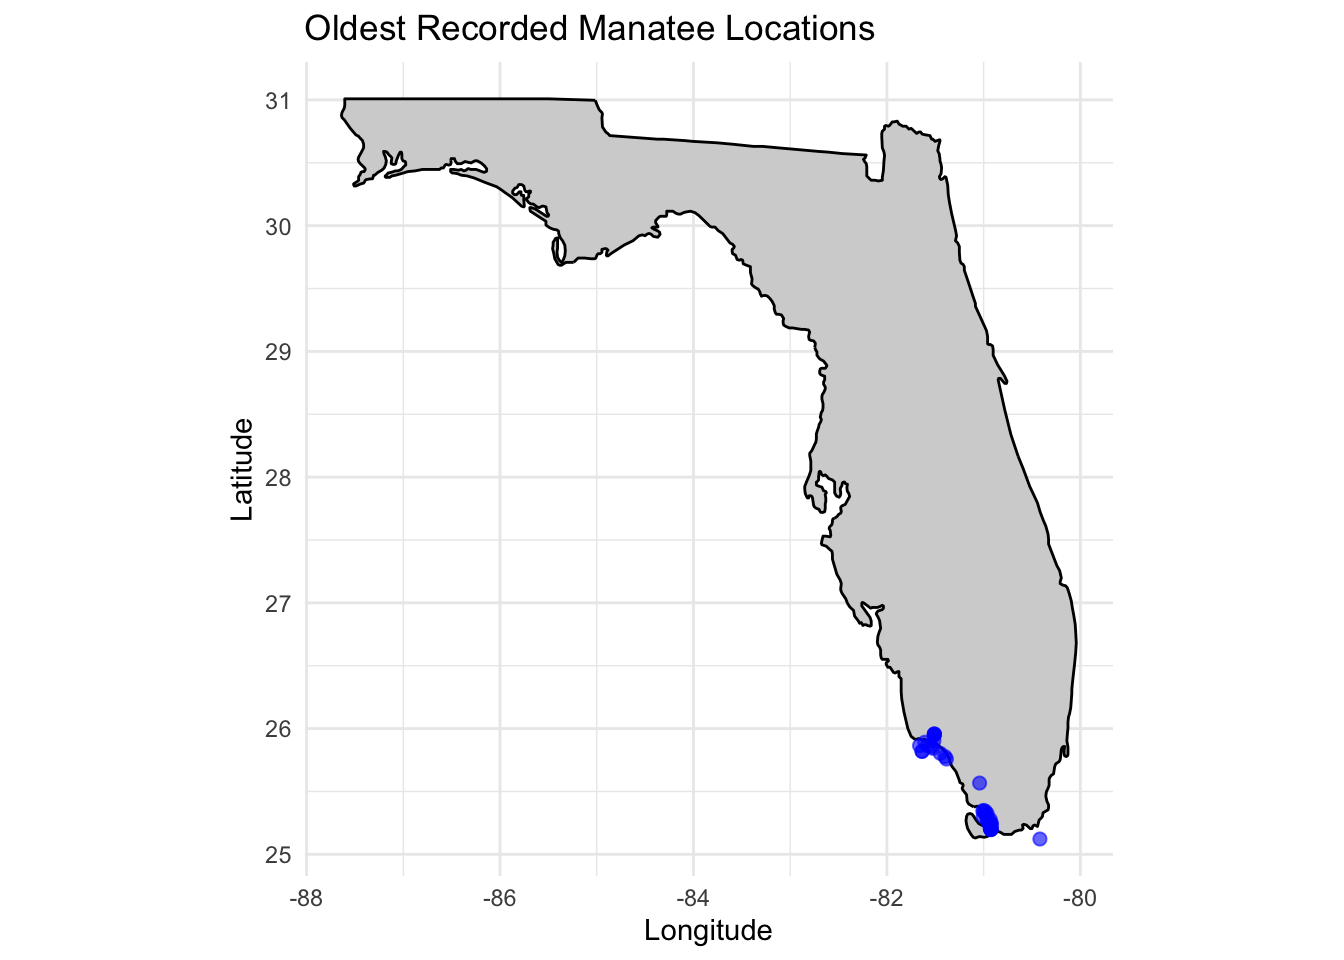

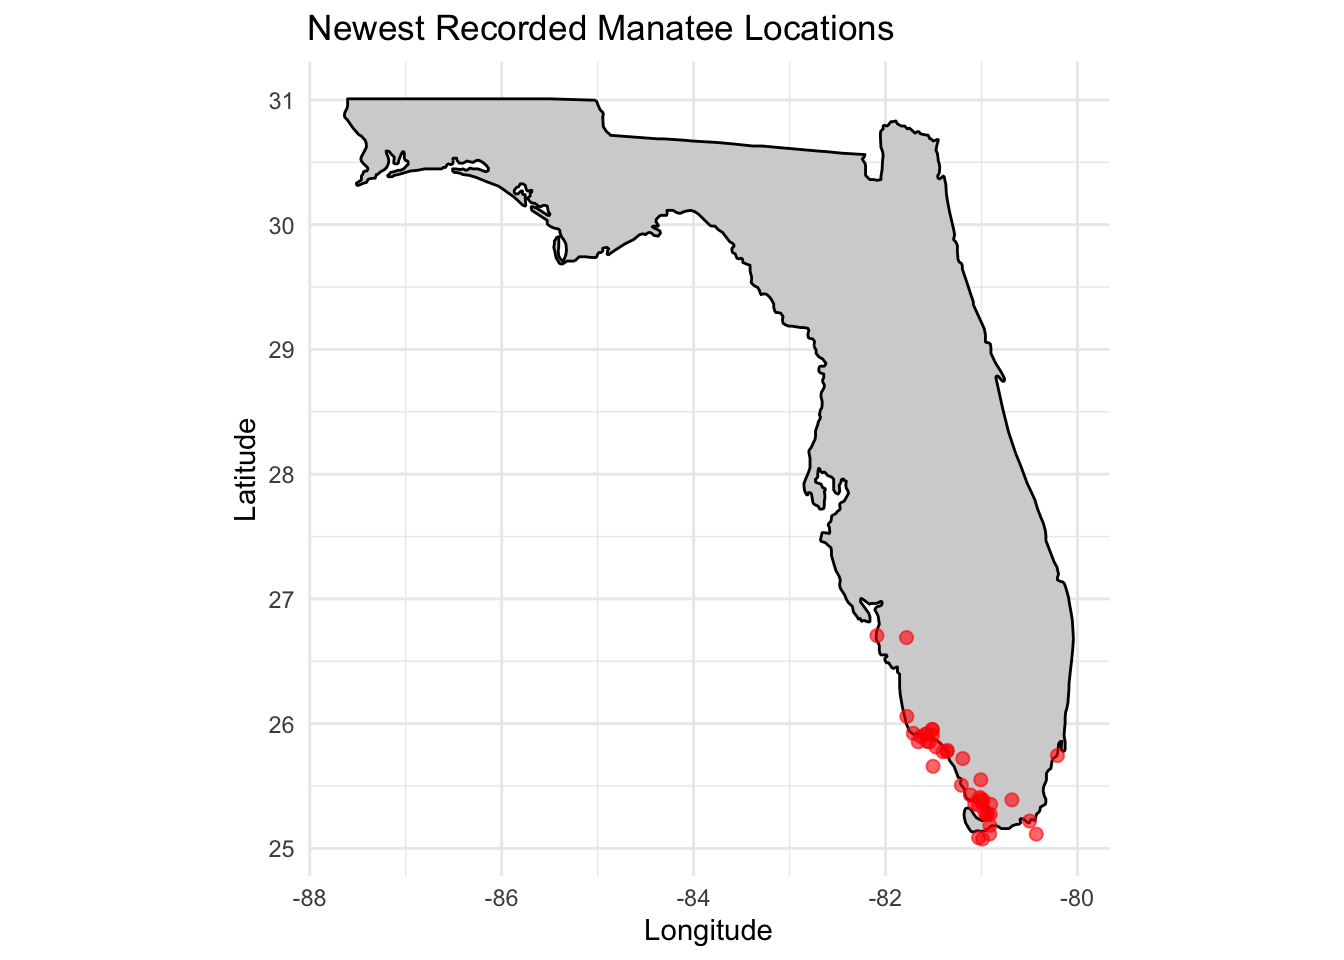

In [ ]:
library(maps)

fl_map <- map_data("state", region = "florida")

ggplot() +
  geom_polygon(data = fl_map, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "black") +
  geom_point(data = old_locs, aes(x = LONGITUDE, y = LATITUDE), 
             color = "blue", alpha = 0.6, size = 2) +
  labs(title = "Oldest Recorded Manatee Locations",
       x = "Longitude", y = "Latitude") +
  coord_fixed(1.3) +
  theme_minimal()

Slone ([2022](#ref-GPS))

**Water Temperature Data:**

We have two ocean temperature data sets as well:

The first data set was provided by the Florida Coastal Everglades LTER Fourqurean ([2025](#ref-FCE)). They conducted a project to measure the impact of ocean temperature on various types of sea grass. Although we will not be looking at sea grass, the ocean temperatures from this data set are perfect for our project. They span over more than 20 years, and are in the exact location we need to be studying. Unfortunately, this data set is inconsistent. at some of the stations they were testing from, there are large gaps in the data. This makes it appear as through average temperature might be decreasing in some places, but we know this is not true. We will need to filter out these problems and make sure everything is aligned correctly.

Our second data set comes from the US Department of the Interior Slone ([2022](#ref-GPS)). It is the data set that aligns with our second set of manatee data. It shows changes in ocean temperature in Southwest Florida. The time span overlaps with our manatee data, and extends into 2015. The only flaw with this is that it also does not have coordinates, so it can not be used for mapping temperature data.

The following graphs show how average ocean temperatures have changed over a 20 year period. This data comes from the Florida Coastal Everglades LTER’s sea grass study. We can see based on these charts that there has been an increase of average ocean temperatures in this region since 2003.

In [ ]:
sea.data <- read.csv("~/Downloads/PHY_Fourqurean_002.csv")

ℹ Please use `linewidth` instead.

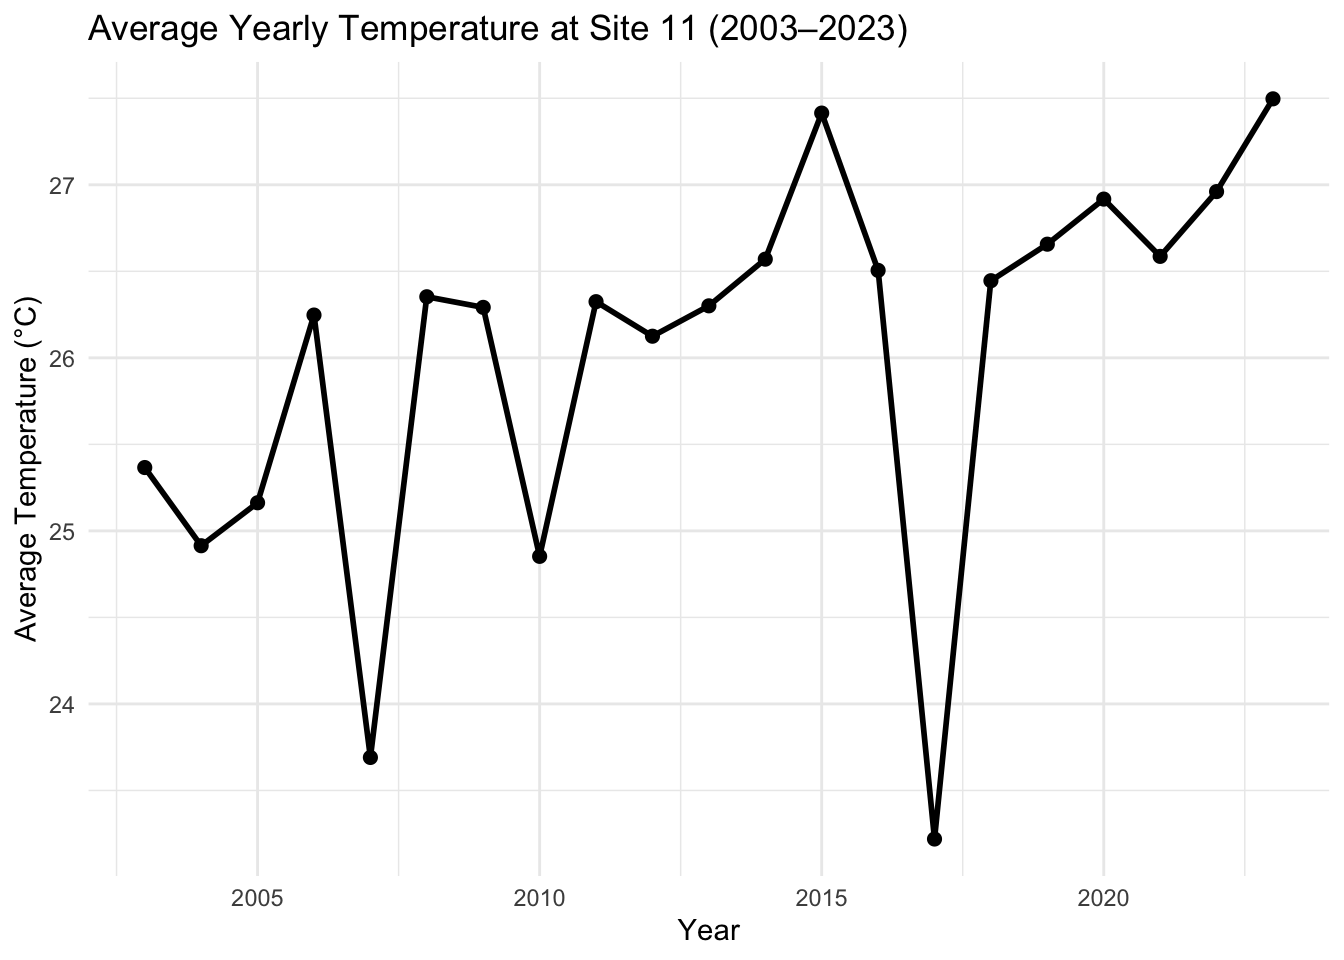

In [ ]:
seasum <- sea.data %>%
  mutate(Year = floor(DecimalYear)) %>%
  filter(Year >= 2003, Year <= 2023) %>% 
  filter(SITENAME == "TS/Ph11") %>%
  group_by(SITENAME, Year) %>%
  summarize(avg_temp = mean(Temperature, na.rm = TRUE), .groups = "drop")


ggplot(seasum, aes(x = Year, y = avg_temp)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Average Yearly Temperature at Site 11 (2003–2023)",
    x = "Year",
    y = "Average Temperature (°C)",
    color = "Site"
  ) +
  theme_minimal()

Fourqurean ([2025](#ref-FCE))

`geom_smooth()` using formula = 'y ~ x'

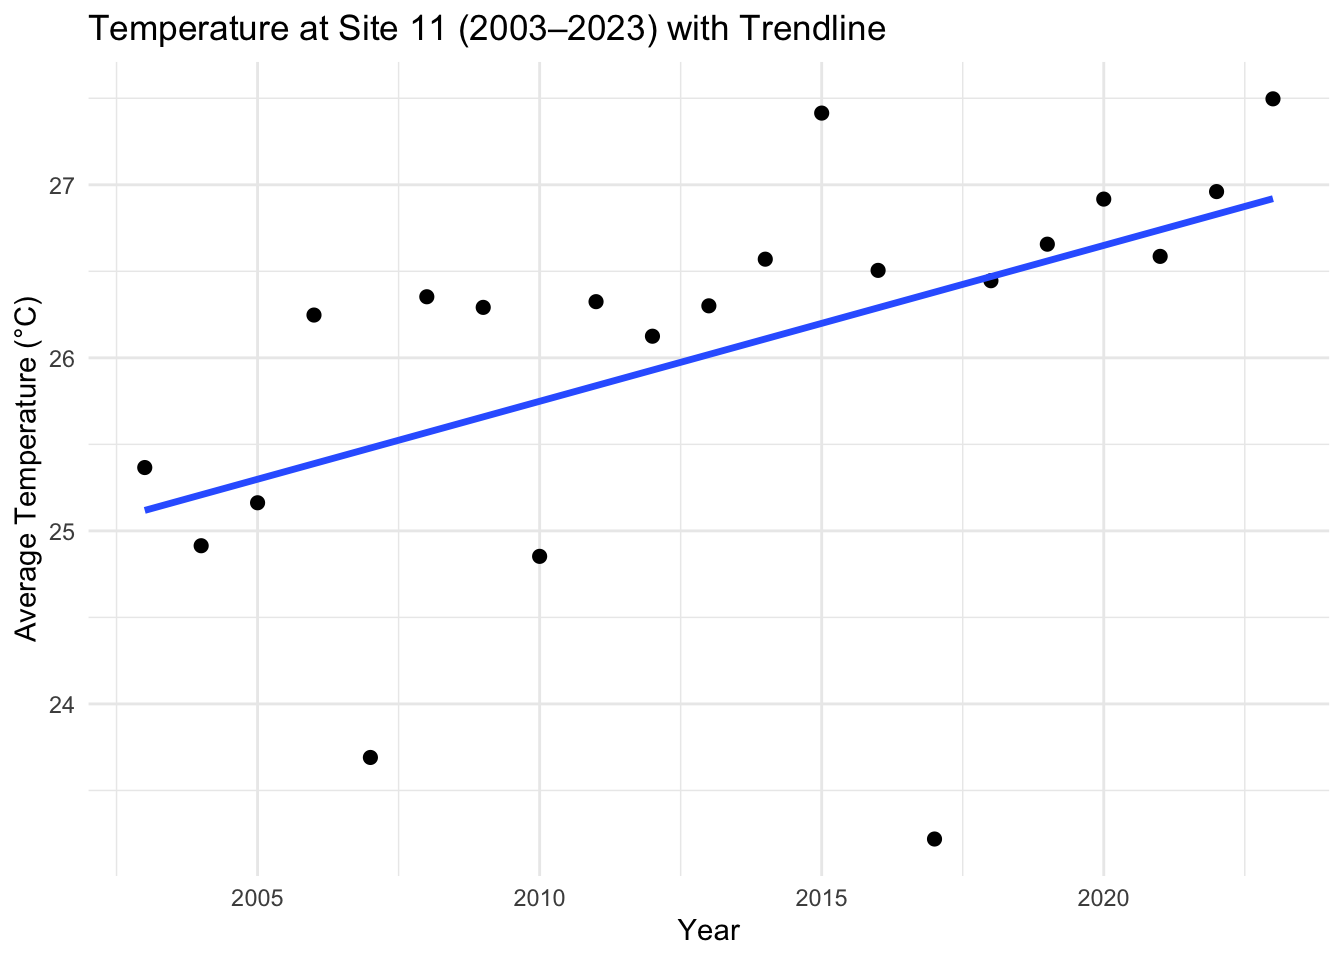

In [ ]:
ggplot(seasum, aes(x = Year, y = avg_temp)) +
  geom_point(size = 2) +  
  geom_smooth(method = "lm", se = FALSE, size = 1.2) +  
  labs(
    title = "Temperature at Site 11 (2003–2023) with Trendline",
    x = "Year",
    y = "Average Temperature (°C)"
  ) +
  theme_minimal()

Fourqurean ([2025](#ref-FCE))

### Preliminary Methods

The goal of this study is to understand how manatee behavior is impacted by rising ocean temperatures. To find this out, we will be comparing various sets of manatee data with corresponding water temperature data. Our manatee data will come from Slone ([2022](#ref-GPS)) and USGS ([2025](#ref-FFW)). The ocean data is from Slone ([2022](#ref-GPS)) and Fourqurean ([2025](#ref-FCE)) .

Our study area will be in Southern Florida, in Everglades National Park as well as the surrounding ocean area. Using measurements from multiple stations, we will examine how ocean temperatures have changed over time. This time span will be from the early 2000’s through the present. Available manatee data is much more limited. As a result, we will have a shorter time span. This should not pose a problem if our water temperature data aligns with our manatee readings.

We will need to manipulate our data to make it more usable for the project. The manatee data from USGS ([2025](#ref-FFW)) currently comes from all of Florida. We will filter it to include only our study area. This data set will just be used to examine how manatee numbers have been changing. Our second manatee data set from Slone ([2022](#ref-GPS)) shows how 40 different manatees moved over a span of 5 years. We will first need to organize this data by the manatee IDs and remove any irrelevant or unavailable data. Then, since some of the tracking data started later, or ended earlier than others, we will need to make multiple different maps dependent on timescale.

Manipulations to our ocean data will be more simple. Both data sets are from our study site, but we may filter our some coordinates if they are too far out. The only flaw in these sets are some missing data points or extreme outliers. These will be removed.

To test our hypothesis, we will be looking at the locations of various manatees over time, as well as the overall populations of adults and calves. This will give us insight into how changing ocean temperatures influence migration patterns and reproductive habits of the manatees in Southern Florida.

###### \*We will continue to work to find additional data for ocean temperatures that includes latitude and longitude columns, and that directly aligns with manatee our manatee data.

### Results:

Using our two main datasets, we were able to make conclusions about changes in ocean temperature as well as about manatee migration. Due to these results, we can reject our null hypothesis that rising ocean temperatures do not impact migration patterns of Southern Florida’s manatees. 

Most of our information regarding ocean temperatures came from the dataset from Florida Coastal Everglades LTER. WWe used this data to understand how ocean temperatures have changed over time, covering a span of over 20 years. We used data from one station, taking yearly averages. This resulted in some variation, but there was an overall increase in average ocean temperatures. This confirms that these temperatures are rising, likely leading to changes in manatee migration patterns. The following graph shows how average temperatures have changed over time, including a rend line to highlight the increase.

`geom_smooth()` using formula = 'y ~ x'

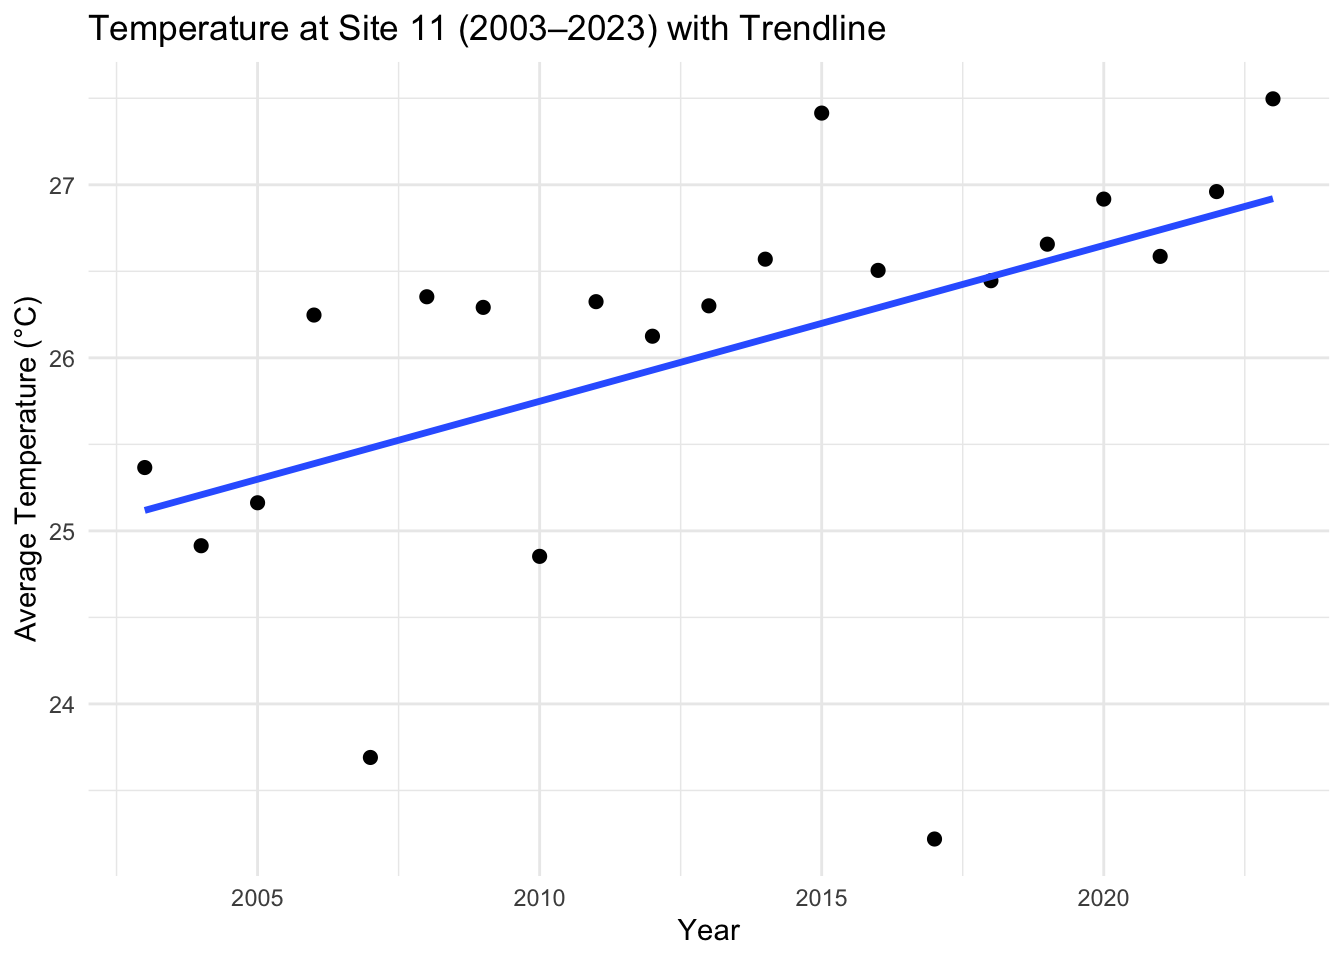

In [ ]:
ggplot(seasum, aes(x = Year, y = avg_temp)) +
  geom_point(size = 2) +  
  geom_smooth(method = "lm", se = FALSE, size = 1.2) +  
  labs(
    title = "Temperature at Site 11 (2003–2023) with Trendline",
    x = "Year",
    y = "Average Temperature (°C)"
  ) +
  theme_minimal()

The dataset from The US Department of the Interior provided information about the movement of manatees using GPS tracking devices. We compared manatee locations from the beginning of the study (2002) to locations at the end of the study (2008). Considering this is a fairly short time period, the manatees had moved to significantly different locations from 2002 to 2008. Some of them had migrated to more northern latitudes, and many of them swam inland, up Florida’s rivers, where water temperatures are more regulated. These were both taken at similar times of year, so these results were not due to seasonal migration. The following figures represent the manatee locations taken at the beginning and the end of the study.

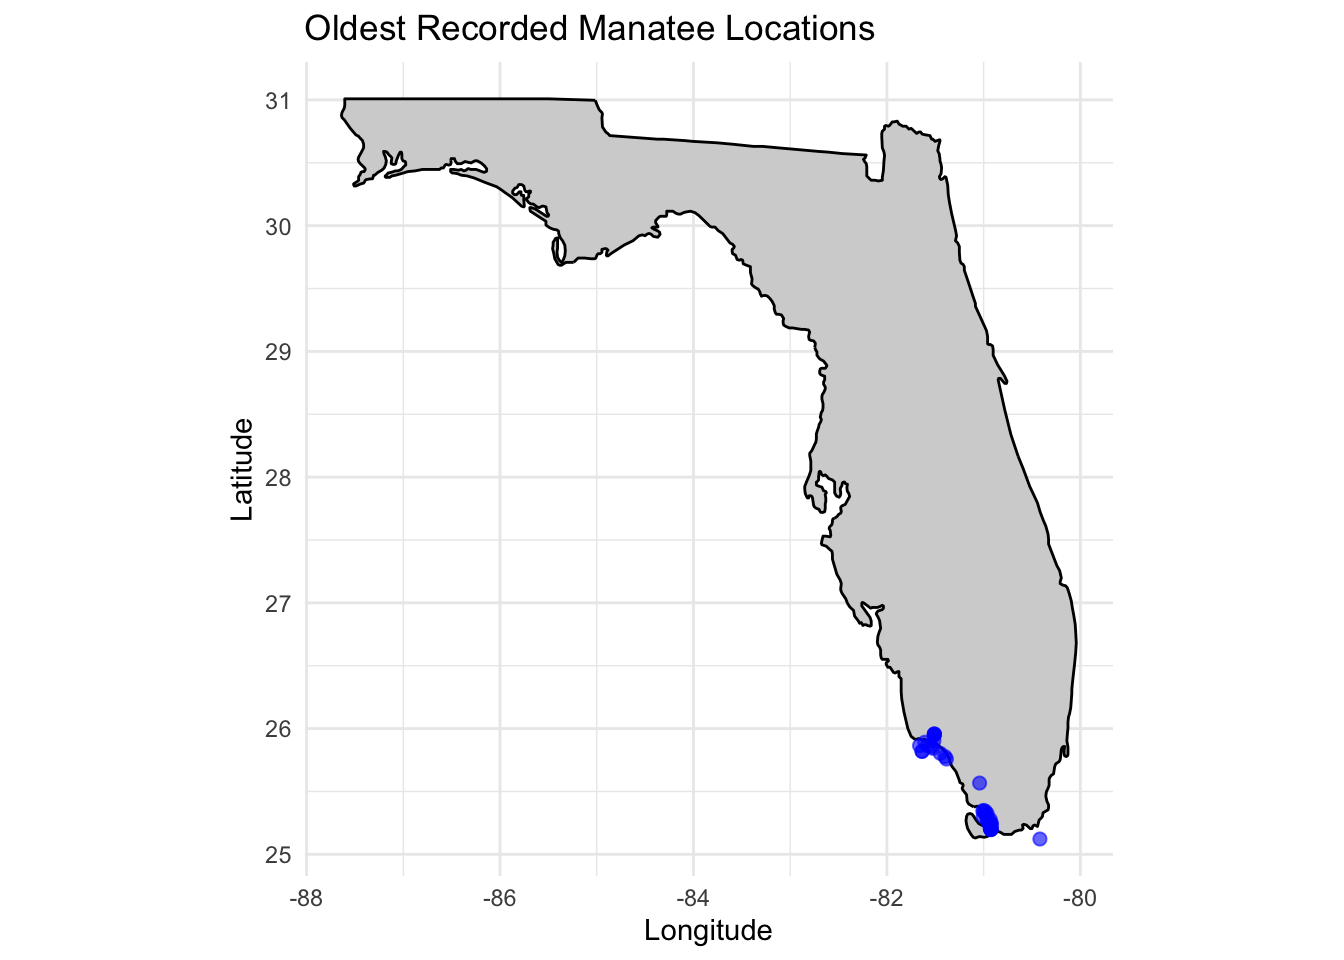

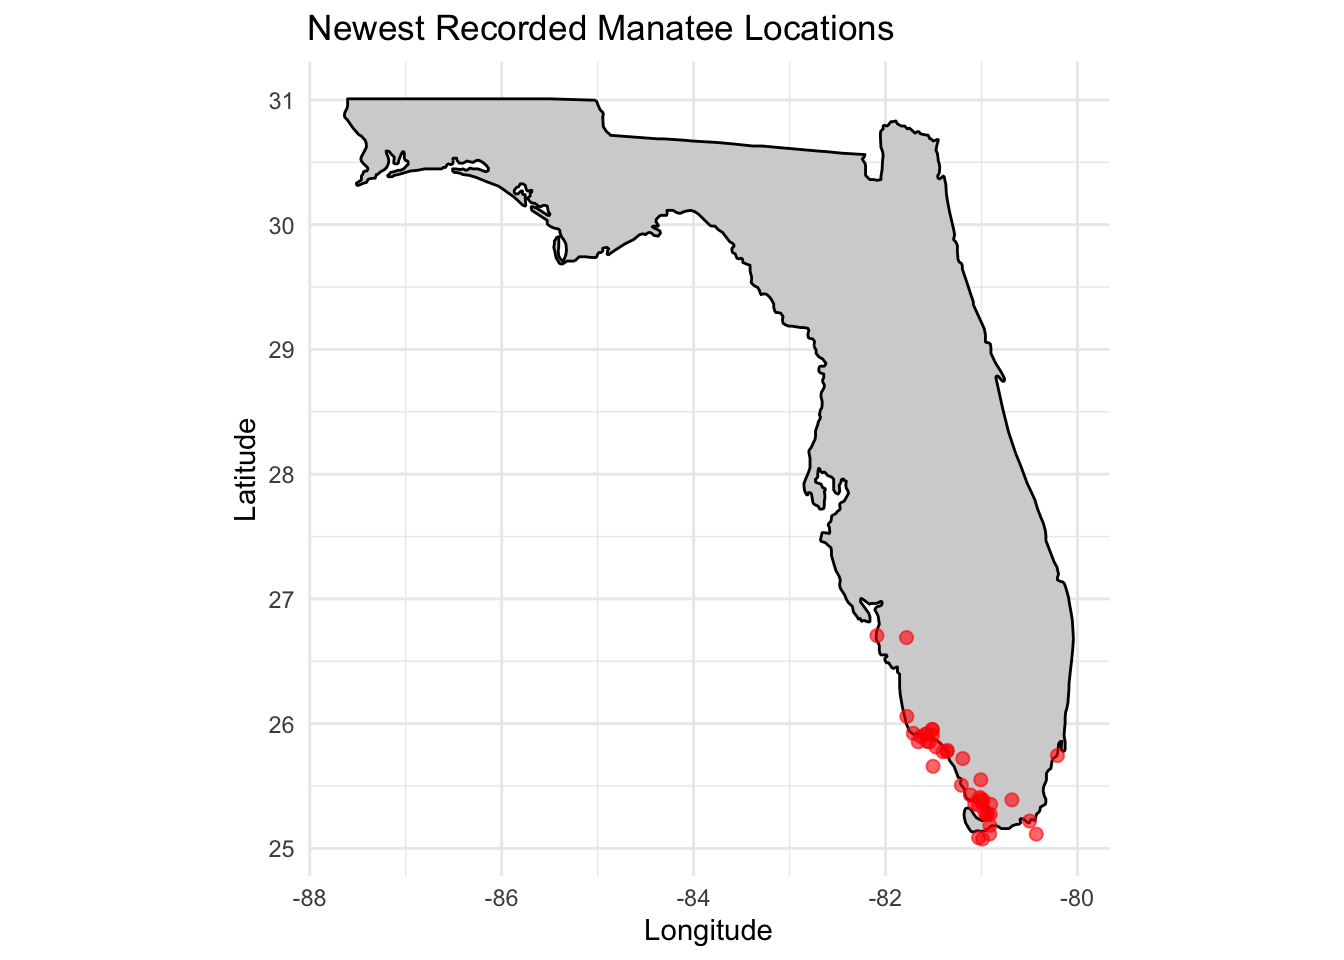

In [ ]:
library(maps)

fl_map <- map_data("state", region = "florida")

ggplot() +
  geom_polygon(data = fl_map, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "black") +
  geom_point(data = old_locs, aes(x = LONGITUDE, y = LATITUDE), 
             color = "blue", alpha = 0.6, size = 2) +
  labs(title = "Oldest Recorded Manatee Locations",
       x = "Longitude", y = "Latitude") +
  coord_fixed(1.3) +
  theme_minimal()

#### Disclaimer:

We have not yet completed our methods section and data analysis. This is because we are hoping to use methods that we have not yet gone over in class. We will be working with Mike to get some help completing these steps. Some of these will include creating a time series utilizing seasonality and ocean temperature data, and predicting the movement of the manatees based on our GPS tracking data. Once this is complete, we will be able to add to our results, and hopefully generate more usable and statistically significant results.

### Discussion:

According to a chapter of “Ethology and Behavioral Ecology of Sirenia” by Deutsch et al., manatees migrate for many reasons Deutsch et al. ([2022](#ref-EBS)). They tend to move inland, up rivers in the winter months of the year Deutsch et al. ([2022](#ref-EBS)). This is partially because temperatures drop, and rivers provide more optimal conditions Deutsch et al. ([2022](#ref-EBS)). However, there are some other reasons for this other than temperature changes. For example, it is suggested that manatees actually need to ingest some fresh water throughout the year, and some may prefer to consume fresh water vegetation Deutsch et al. ([2022](#ref-EBS)). This study found significant variation in migration patterns between individual manatees, meaning that they are very adaptable to different conditions. 

Additionally, an article from the” Journal of Comparative Physiology” suggests that manatees are very sensitive to cold water temperatures as opposed to warmer ones because of their limited “thermoneutral zone” Erdsack et al. ([2018](#ref-JCP)). One major natural cause of manatee mortality is cold water conditions, and they have not recorded high temperature as a cause  Erdsack et al. ([2018](#ref-JCP)). This could mean that manatees will be less susceptible to any harm caused by future increases in sea temperatures.

Because of this information, we can infer that manatee migration is not all due to ocean temperature. It is true that they migrate inland in the winter months, mainly because ocean temperatures drop Deutsch et al. ([2022](#ref-EBS)). However, they also need to make this move regardless of temperature in order to meet their biological needs ([**EBS.because?**](#ref-EBS.because)) of this, we can conclude that rising ocean temperatures due to climate change will not cause much harm to manatee populations or migration patterns, as long as it does not surpass safe, livable conditions. Instead, slightly higher temperatures could provide them with more flexibility in their migration, and prevent mortality caused by cold conditions. 

By gaining a new understanding of the complexities behind manatee behavior, we can see that our study is inconclusive. We failed to recognize the many factors in addition to water temperature that influence manatee migration, and we did not take into account the processes that they use to regulate body temperature. Since manatee migration is not impacted by ocean temperature in the way we had predicted, we must fail to reject our null hypothesis.

Manatee migration is currently very unpredictable Deutsch et al. ([2022](#ref-EBS)). More research is needed to understand not only current causes of migration, but also how rising ocean temperatures will impact them. This research will need to be very up close and personal with individual manatees. I would suggest that researchers find multiple manatees that exhibit very different behavior, and follow them closely. It is important to gather information regarding the factors that they are most sensitive to and that drive migration.

#### References:

Deutsch, C. J., Castelblanco-Martı́nez, D. N., Groom, R., & Cleguer, C. (2022). Movement behavior of manatees and dugongs: I. Environmental challenges drive diversity in migratory patterns and other large-scale movements. In *Ethology and behavioral ecology of sirenia* (pp. 155–231). Springer.

Erdsack, N., McCully Phillips, S. R., Rommel, S. A., Pabst, D. A., McLellan, W. A., & Reynolds, J. E. (2018). Heat flux in manatees: An individual matter and a novel approach to assess and monitor the thermal state of florida manatees (trichechus manatus latirostris). *Journal of Comparative Physiology B*, *188*, 717–727.

Fourqurean, J. (2025). *Florida bay seagrass canopy temperature data,(FCE LTER), september 2000 - ongoing* \[Dataset\]. Environmental Data Initiative. <https://doi.org/10.6073/pasta/80ca188bd67ae078b5c7ea5f84efed4e>

Garder, A. L. (2025). *Manatee*. <https://www.fws.gov/species/manatee-trichechus-manatus>

Kathiresan, K. (2012). Importance of mangrove ecosystem. *International Journal of Marine Science*, *2*(10).

Littles, C. J., Pilyugin, S. S., & Frazer, T. K. (2016). A combined inverse method and multivariate approach for exploring population trends of florida manatees. *Marine Mammal Science*, *32*(1), 122–140.

Slone, D. H. et al. (2022). *GPS telemetry of florida manatees and riverine water temperatures from suthwest florida 2002-2015* \[Dataset\]. US Geological Survey. <https://doi.org/10.5066/P9QT5VC1>

USGS. (2025). *Manatee synoptic survey observation locations* \[Dataset\]. Environmental Data Initiative. <https://www.sciencebase.gov/catalog/item/62c5ed3ed34eeb1417bafe71>